In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_256=pd.read_csv("eval_256/W_KL_SO_256/epoch=000023/DDPM_200_WaveletSRDataset.csv")
df_256.columns

In [11]:
df_256.sort_values(by="psnr",ascending=False).head(10)

,img,mode,psnr,ssim,lpips,enl,epi
427,2937.jpg,DDPM,21.198486,0.340707,0.539908,12.657431,0.329549
387,2731.jpg,DDPM,20.633318,0.296619,0.554716,10.666902,0.302687
948,5287.jpg,DDPM,20.597338,0.323734,0.563920,7.149099,0.330100
658,4000.jpg,DDPM,20.560141,0.293681,0.555895,8.915745,0.294199
628,3894.jpg,DDPM,20.459854,0.289769,0.548938,11.514562,0.278641
429,2942.jpg,DDPM,20.424039,0.270153,0.596474,6.762282,0.306474
451,3052.jpg,DDPM,20.287314,0.285782,0.568061,8.504578,0.323006
101,1442.jpg,DDPM,20.281064,0.247922,0.555102,6.246891,0.184427
511,3344.jpg,DDPM,20.115092,0.344689,0.560752,7.626002,0.368780
428,2940.jpg,DDPM,20.064755,0.273776,0.555162,10.510164,0.322586


In [3]:
from scipy.stats import gaussian_kde
import os
def psnr_kde(df):
    psnr=df['psnr']
    psnr_array=np.array(psnr)
    fig_psnr,ax=plt.subplots()
    kde = gaussian_kde(psnr_array)
    x_range = np.linspace(psnr_array.min(), psnr_array.max(), 200)
    ax.fill_between(x_range, kde(x_range), alpha=0.5)
    ax.plot(x_range, kde(x_range))
    ax.set_title("KDE of PSNR")
    plt.show()


ds1


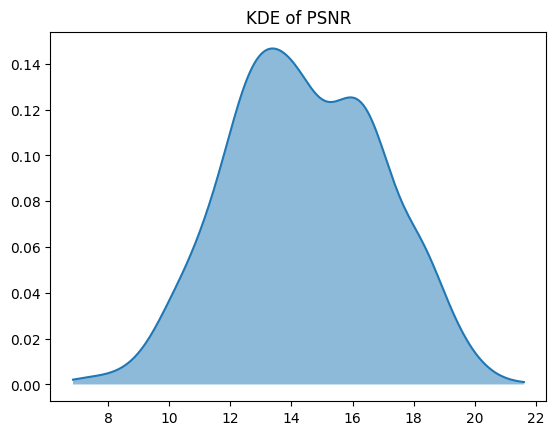

ds2


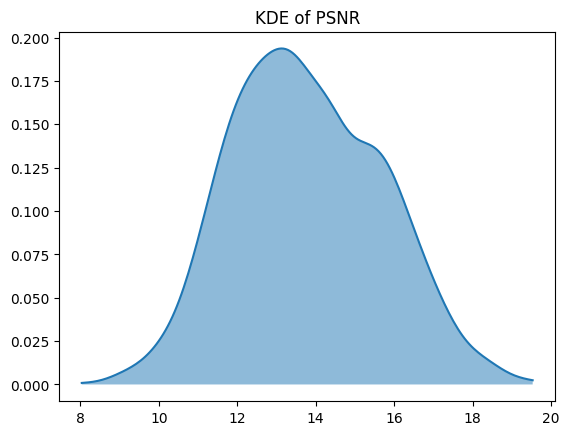

ds3


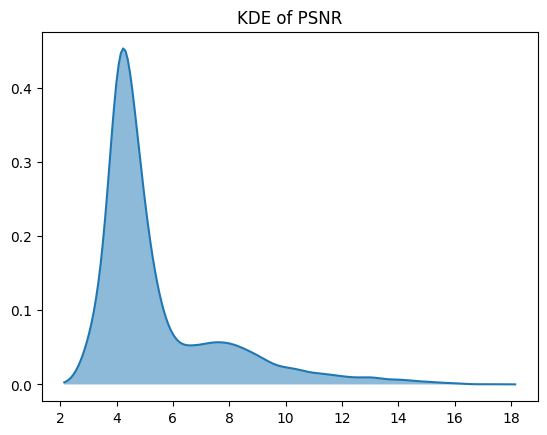

ds4


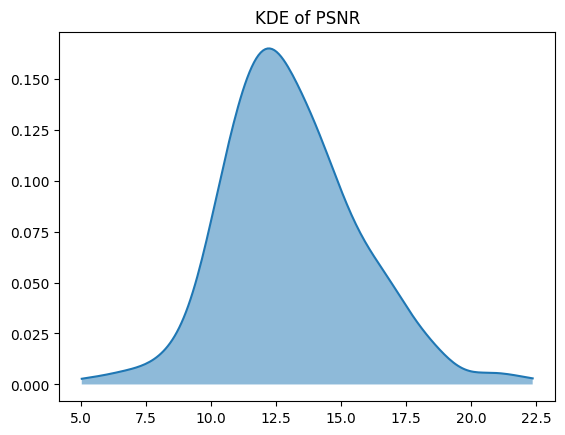

ds5


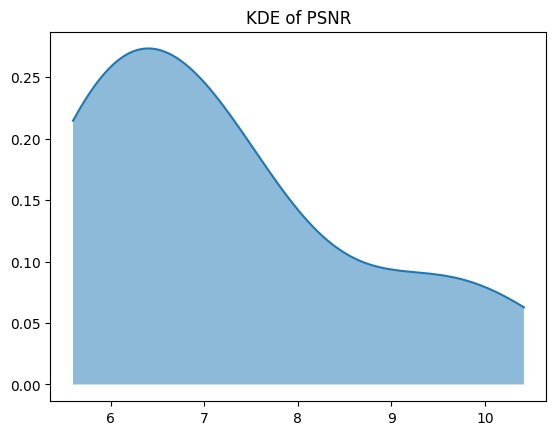

In [5]:
for ds in ['ds1','ds2','ds3','ds4','ds5']:
    path=os.path.join("eval_kl_256",ds,"W_KL_SO_256/epoch=000022/DDPM_200_WaveletSRDataset.csv")
    df=pd.read_csv(path)
    print(ds)
    psnr_kde(df)